## SPRT Data Analysis


### 0. Setting Up


#### Loading Libraries


The relevant packages are loaded into the script. These are:

- **Tidyverse**, for piping functionality as well as all the other included packages such as `ggplot2`.
- **lmerTest**, for linear mixed models and _p_-values.
- **ggthemes**, for extended plot customization.
- **gt**, for table creation.
- **broom.mixed**, for processing mixed model output.


In [1]:
library(tidyverse)
library(lmerTest)
library(ggthemes)
library(gt)
library(broom.mixed)
library(ggdist)
library(patchwork)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




#### Color Variables


In [2]:
accent_color <- "#354c7c"
secondary_color <- "#e3dddd"

plot_colors <- c(
    "SR" = "#845EC2",
    "SS" = "#845EC2",
    "OR" = "#D65DB1",
    "PP" = "#D65DB1",
    "SP" = "#FF6F91",
    "PS" = "#FF9671"
)


#### Path Variables


In [3]:
tables_path <- "./images/tables/"
plots_path <- "./images/plots/"


#### Default Plot Theme


In [4]:
custom_theme <-
    theme(
        plot.title = element_text(size = 12, face = "bold", margin = margin(b = 10)),
        plot.subtitle = element_text(size = 11, face = "bold"),
        plot.background = element_rect(linewidth = 0),
        strip.background = element_rect(fill = accent_color, color = accent_color),
        strip.text = element_text(color = "white", size = 12, face = "bold"),
        axis.title.x = element_text(size = 10, face = "bold", margin = margin(t = 10)),
        axis.title.y = element_text(size = 10, face = "bold", margin = margin(r = 10)),
        axis.line = element_line(color = accent_color, linewidth = 1),
        axis.ticks = element_blank(),
        legend.title = element_text(face = "bold"),
        panel.border = element_rect(color = secondary_color, linewidth = 0.5),
        panel.background = element_blank(),
        panel.grid.major.x = element_line(color = secondary_color, linewidth = 0.5),
        panel.grid.major.y = element_line(color = secondary_color, linewidth = 0.5)
    )
theme_set(theme_calc() + custom_theme)


### 1. Participant Data


#### Importing Participant Data


In [5]:
df_part <- read.csv("./data/part_data.csv")
df_part$part_name <- NULL
df_part$part_mail <- NULL
summary(df_part)


    part_id      part_experiment      part_age          part_lang        
 Min.   :20.00   Length:12          Length:12          Length:12         
 1st Qu.:25.00   Class :character   Class :character   Class :character  
 Median :30.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :28.92                                                           
 3rd Qu.:33.25                                                           
 Max.   :37.00                                                           
 part_impaired      part_abroad        part_certificate   part_cat_exp      
 Length:12          Length:12          Length:12          Length:12         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

#### Cleaning Participant Data


In [6]:
df_part <- df_part %>%
    select(part_experiment, part_id, part_age, part_lang, part_impaired, part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro, part_eng_onset_time) %>%
    mutate(
        across(
            c(part_experiment, part_id, part_age, part_lang, part_impaired, part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro),
            factor
        )
    ) %>%
    filter(part_experiment == "TFG") %>%
    rename(part_id = part_id) %>%
    droplevels()

df_part$part_experiment <- NULL

glimpse(df_part)


Rows: 5
Columns: 13
$ part_id             <fct> 34, 37, 32, 31, 29
$ part_age            <fct> 18 - 25, 26 - 30, 18 - 25, 18 - 25, 18 - 25
$ part_lang           <fct> "Catalan, Spanish", "Catalan, Spanish", "Catalan, …
$ part_impaired       <fct> No, No, No, No, No
$ part_abroad         <fct> No, No, No, No, No
$ part_certificate    <fct> B2 (First), C1 (Advanced), C1 (Advanced), C1 (Adva…
$ part_cat_exp        <fct> 1h - 3h, 1h - 3h, > 5h, 1h - 3h, < 1h
$ part_cat_pro        <fct> 1h - 3h, 1h - 3h, > 5h, > 5h, < 1h
$ part_spa_exp        <fct> 3h - 5h, > 5h, 3h - 5h, 3h - 5h, > 5h
$ part_spa_pro        <fct> 3h - 5h, > 5h, 3h - 5h, 1h - 3h, > 5h
$ part_eng_exp        <fct> 3h - 5h, > 5h, 1h - 3h, 1h - 3h, > 5h
$ part_eng_pro        <fct> 3h - 5h, 1h - 3h, 1h - 3h, < 1h, 1h - 3h
$ part_eng_onset_time <int> 6, 17, 6, 10, 6


### 2. Task Data


#### Importing Task Data


In [7]:
df_example <- read.csv("./data/32.csv")
str(df_example)


'data.frame':	309 obs. of  18 variables:
 $ rt            : int  2322825 1536 1222 1408 1249 1102 2405 1727 1111 968 ...
 $ response      : chr  "{\"part_id\":\"32\"}" " " " " " " ...
 $ trial_type    : chr  "survey-html-form" "html-keyboard-response" "html-keyboard-response" "html-keyboard-response" ...
 $ trial_index   : int  0 2 3 4 5 6 7 9 10 11 ...
 $ plugin_version: chr  "2.0.0" "2.0.0" "2.0.0" "2.0.0" ...
 $ time_elapsed  : int  2325458 2368979 2370201 2371610 2372859 2373964 2376370 2378602 2379714 2380683 ...
 $ part_id       : int  32 32 32 32 32 32 32 32 32 32 ...
 $ task          : chr  "" "item" "item" "item" ...
 $ item_number   : chr  "" "null" "null" "null" ...
 $ item_type     : chr  "" "pr_item" "pr_item" "pr_item" ...
 $ segment       : chr  "" "s0" "s1" "s2" ...
 $ clause_type   : chr  "" "sr" "sr" "sr" ...
 $ number        : chr  "" "ss" "ss" "ss" ...
 $ stimulus      : chr  "" "<p class=\"trial-stimulus\">_______ | ____ | _______ | _______ | ____</p>" "<p class=\"

In [8]:
df_raw <- reduce(
    list(
        select(read.csv("./data/29.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct_answer, part_answer, correct),
        select(read.csv("./data/31.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct_answer, part_answer, correct),
        select(read.csv("./data/32.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct_answer, part_answer, correct),
        select(read.csv("./data/34.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct_answer, part_answer, correct),
        select(read.csv("./data/37.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct_answer, part_answer, correct)
    ),
    rbind
)
glimpse(df_raw)


Rows: 1,545
Columns: 11
$ part_id        <int> 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,…
$ task           <chr> "", "item", "item", "item", "item", "item", "item", "it…
$ item_number    <chr> "", "null", "null", "null", "null", "null", "null", "nu…
$ item_type      <chr> "", "pr_item", "pr_item", "pr_item", "pr_item", "pr_ite…
$ clause_type    <chr> "", "sr", "sr", "sr", "sr", "sr", "sr", "or", "or", "or…
$ number         <chr> "", "ss", "ss", "ss", "ss", "ss", "ss", "ss", "ss", "ss…
$ segment        <chr> "", "s0", "s1", "s2", "s3", "s4", "s5", "s0", "s1", "s2…
$ rt             <int> 2413859, 2521, 405, 368, 350, 382, 376, 1004, 414, 408,…
$ correct_answer <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "j"…
$ part_answer    <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "j"…
$ correct        <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, …


#### Cleaning Task Data


In [9]:
df_clean <- df_raw %>%
    arrange(part_id) %>%
    filter(.$item_type == "exp_item" & .$segment != "s0") %>%
    mutate(
        across(
            c(task, item_type, part_id),
            factor
        ),
        item_number = as.numeric(item_number),
        clause_type = factor(clause_type, levels = c("sr", "or"), labels = c("SR", "OR")),
        number = factor(number, levels = c("ss", "pp", "sp", "ps"), labels = c("SS", "PP", "SP", "PS")),
        matching = factor(ifelse(number == "SS" | number == "PP", "match", "mismatch"), labels = c("Match", "Mismatch")),
        segment = factor(segment, labels = c("Q", "S1", "S2", "S3", "S4", "S5")),
        part_answer = tolower(part_answer),
        correct = ifelse(correct_answer == part_answer, 1, 0)
    ) %>%
    relocate(matching, .after = number) %>%
    droplevels()

glimpse(df_clean)


Rows: 840
Columns: 12
$ part_id        <fct> 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,…
$ task           <fct> item, item, item, item, item, item, item, item, item, i…
$ item_number    <dbl> 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ item_type      <fct> exp_item, exp_item, exp_item, exp_item, exp_item, exp_i…
$ clause_type    <fct> OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR,…
$ number         <fct> PP, PP, PP, PP, PP, SP, SP, SP, SP, SP, SP, PP, PP, PP,…
$ matching       <fct> Match, Match, Match, Match, Match, Mismatch, Mismatch, …
$ segment        <fct> S1, S2, S3, S4, S5, S1, S2, S3, S4, S5, Q, S1, S2, S3, …
$ rt             <int> 719, 548, 800, 1176, 1303, 688, 607, 1071, 1832, 2768, …
$ correct_answer <chr> "", "", "", "", "", "", "", "", "", "", "j", "", "", ""…
$ part_answer    <chr> "", "", "", "", "", "", "", "", "", "", "j", "", "", ""…
$ correct        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


#### Accuracy Data


In [10]:
df_clean %>%
    filter(
        task == "question"
    ) %>%
    group_by(part_id) %>%
    summarise(correct_pct = (sum(correct == 1) / (sum(correct == 1) + sum(correct == 0))) * 100)


part_id,correct_pct
<fct>,<dbl>
29,100.0
31,87.5
32,87.5
34,62.5
37,100.0


#### Normalization


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


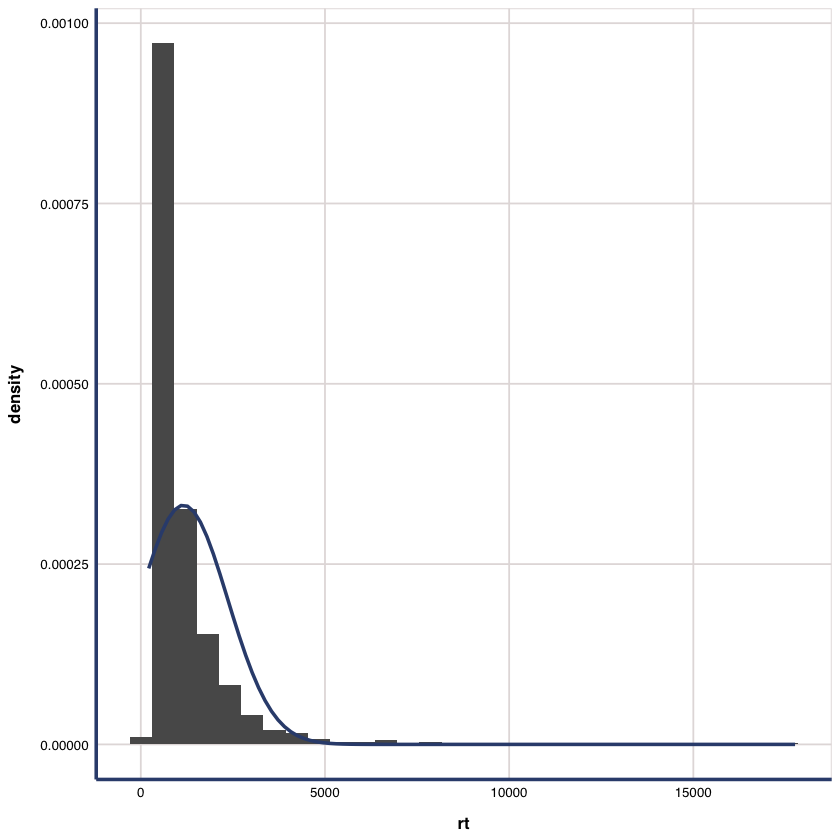

In [11]:
skewed_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
skewed_plot


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


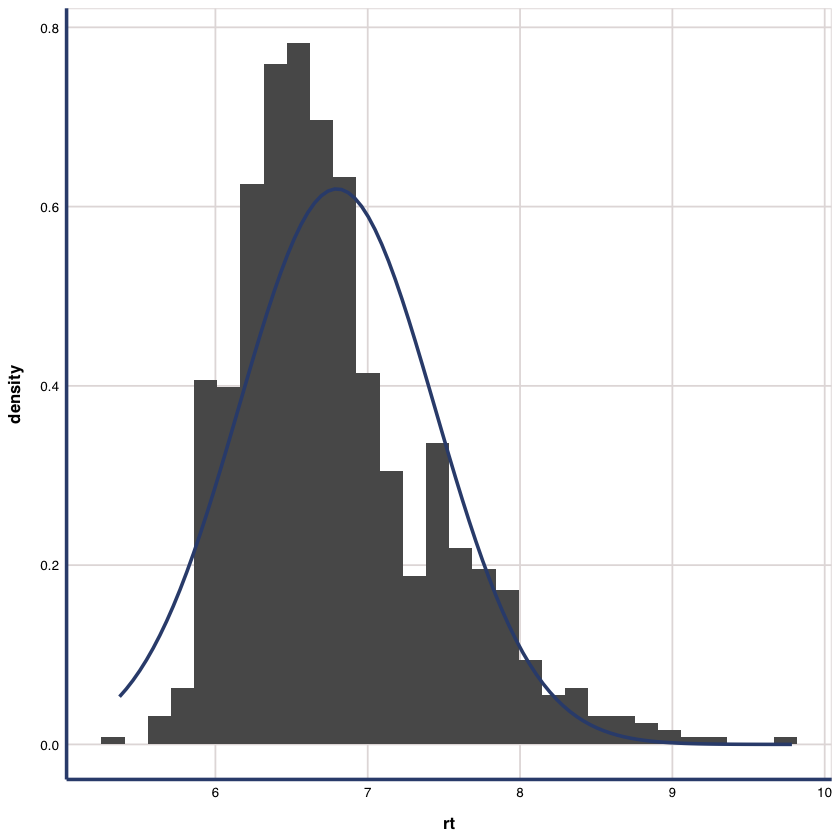

In [12]:
df_clean <- df_clean %>%
    mutate(rt = log(rt))

normal_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
normal_plot


In [13]:
q1 <- quantile(df_clean$rt, 0.25)
q3 <- quantile(df_clean$rt, 0.75)
iqr <- q3 - q1
lower_limit <- q1 - iqr * 1.5
upper_limit <- q3 + iqr * 1.5

exp(lower_limit)
exp(upper_limit)

n_obs_pre <- nrow(df_clean)

set_wrong_answer <- function(df) {
    for (i in seq_len(nrow(df))) {
        if (df$correct[i] == 0) {
            start_row <- max(1, i - 5)
            df$correct[start_row:i] <- 0
        }
    }
    return(df)
}

df_clean <- set_wrong_answer(df_clean)

df_clean <- df_clean %>%
    filter(.$rt > lower_limit & .$rt < upper_limit & correct == 1)

n_obs_post <- nrow(df_clean)

n_outliers <- n_obs_pre - n_obs_post


25% 
176.6538

75% 
3997.248

In [14]:
cat("Number of outliers:", n_outliers, "\n")

cat("Percentage of data loss:", round(n_outliers * 100 / n_obs_pre, 2), "%")


Number of outliers: 50 
Percentage of data loss: 5.95 %

In [15]:
distribution_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(
        aes(y = ..density..),
        fill = "#FF9671"
    ) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    ) +
    labs(
        title = "RT Data Distribution",
        x = "Reaction Times (log10)",
        y = element_blank()
    ) +
    theme(
        panel.grid.major.x = element_blank()
    )

ggsave(filename = "distribution_plot.png", path = plots_path, height = 7, width = 14, unit = "cm")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In [16]:
summary(exp(df_clean$rt))
sd(exp(df_clean$rt))

shapiro.test(df_clean$rt)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  215.0   569.0   773.5  1008.5  1172.0  3790.0 

[1] 668.2485


	Shapiro-Wilk normality test

data:  df_clean$rt
W = 0.96201, p-value = 1.882e-13


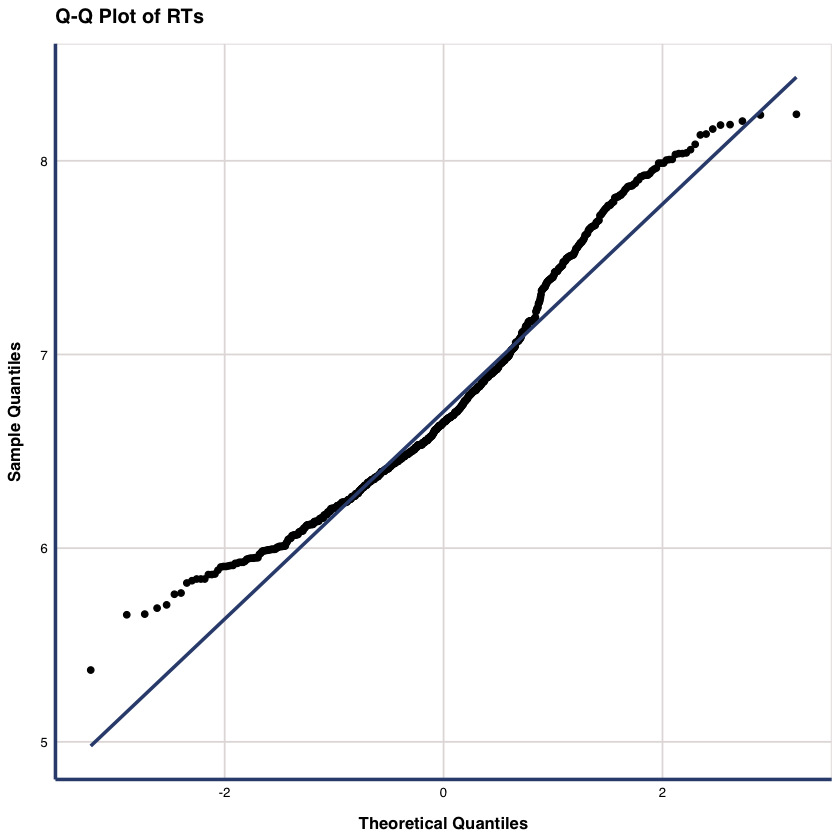

In [17]:
qq_plot <- df_clean %>%
    ggplot(aes(sample = rt)) +
    stat_qq() +
    stat_qq_line(color = accent_color, linewidth = 1) +
    labs(title = "Q-Q Plot of RTs", x = "Theoretical Quantiles", y = "Sample Quantiles")
qq_plot


#### Merging Participant and Task Data


In [18]:
df_part$part_experiment <- NULL

df_merged <- merge(df_clean, df_part, by = "part_id")
summary(df_merged)


 part_id        task      item_number       item_type   clause_type number  
 29:164   item    :762   Min.   :1.000   exp_item:790   SR:391      SS:198  
 31:158   question: 28   1st Qu.:1.750                  OR:399      PP:200  
 32:158                  Median :4.000                              SP:200  
 34:142                  Mean   :4.981                              PS:192  
 37:168                  3rd Qu.:7.000                                      
                         Max.   :8.000                                      
     matching   segment        rt        correct_answer     part_answer       
 Match   :398   Q : 28   Min.   :5.371   Length:790         Length:790        
 Mismatch:392   S1:154   1st Qu.:6.344   Class :character   Class :character  
                S2:152   Median :6.651   Mode  :character   Mode  :character  
                S3:155   Mean   :6.746                                        
                S4:151   3rd Qu.:7.066                            

### 3. Mixed Effects Models


#### Accuracy Data


#### Clause Effects Model


In [19]:
lm_clause <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ clause_type + (1 | part_eng_exp) + (1 | part_eng_pro))
summary(lm_clause)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type + (1 | part_eng_exp) + (1 | part_eng_pro)
   Data: .

REML criterion at convergence: 412.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1651 -0.6742 -0.1335  0.5554  3.2170 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 part_eng_exp (Intercept) 8.076e-02 0.2841906
 part_eng_pro (Intercept) 9.960e-09 0.0000998
 Residual                 2.147e-01 0.4633407
Number of obs: 306, groups:  part_eng_exp, 3; part_eng_pro, 3

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     6.69302    0.16862   2.12867  39.693 0.000431 ***
clause_typeOR   0.26105    0.05298 302.02589   4.927 1.38e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
claus_typOR -0.159

In [20]:
lm_clause_tidy <- lm_clause %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        estimate = exp(estimate),
        code = case_when(
            p.value < 0.001 ~ "***",
            p.value < 0.01 ~ "**",
            p.value < 0.05 ~ "*",
            p.value > 0.05 ~ " "
        ),
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ as.character(round(p.value, 2)),
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR",
            term == "clause_typeOR" ~ "OR",
        )
    )

lm_clause_tidy$estimate <- ifelse(lm_clause_tidy$term != "SR", lm_clause_tidy$estimate[1] * lm_clause_tidy$estimate, lm_clause_tidy$estimate)

lm_clause_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR,806.7564,0.16861838,39.693310,2.128667,< 0.001,***
fixed,NA,OR,1047.4046,0.05298202,4.927121,302.025885,< 0.001,***


In [21]:
lm_clause_table <- lm_clause_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 453.5,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        column_labels.font.weight = "bold",
        heading.border.bottom.color = accent_color,
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**1st LME Model Output**"),
        subtitle = md("**Effects of *Clause Type* on RTs**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Predicted Mean RTs (ms)",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

gtsave(lm_clause_table, filename = "clause_table.png", path = tables_path)


file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//Rtmp9NNoog/file367279abdcb3.html screenshot completed



#### Number Effects Model


In [22]:
lm_number <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ number * clause_type + (1 | part_eng_exp) + (1 | part_eng_pro))
summary(lm_number)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ number * clause_type + (1 | part_eng_exp) + (1 | part_eng_pro)
   Data: .

REML criterion at convergence: 427.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1506 -0.6704 -0.0725  0.5170  3.2079 

Random effects:
 Groups       Name        Variance Std.Dev.
 part_eng_exp (Intercept) 0.07978  0.2824  
 part_eng_pro (Intercept) 0.00000  0.0000  
 Residual                 0.21750  0.4664  
Number of obs: 306, groups:  part_eng_exp, 3; part_eng_pro, 3

Fixed effects:
                        Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              6.65686    0.17996   2.82713  36.991 6.96e-05 ***
numberPP                -0.01671    0.10699 296.02419  -0.156  0.87598    
numberSP                 0.06989    0.10706 296.05148   0.653  0.51439    
numberPS                 0.09461    0.10706 296.05148   0.884  0.37757    
clause_typeOR            0.29339    0.10

In [23]:
lm_number_tidy <- lm_number %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        estimate = exp(estimate),
        code = case_when(
            p.value < 0.001 ~ "***",
            p.value < 0.01 ~ "**",
            p.value < 0.05 ~ "*",
            p.value > 0.05 ~ " "
        ),
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ as.character(round(p.value, 2)),
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR * SS",
            term == "clause_typeOR" ~ "OR * SS",
            term == "numberPP" ~ "SR * PP",
            term == "numberSP" ~ "SR * SP",
            term == "numberPS" ~ "SR * PS",
            term == "numberPP:clause_typeOR" ~ "OR * PP",
            term == "numberSP:clause_typeOR" ~ "OR * SP",
            term == "numberPS:clause_typeOR" ~ "OR * PS",
        )
    )

lm_number_tidy$estimate <- ifelse(lm_number_tidy$term != "SR * SS", lm_number_tidy$estimate[1] * lm_number_tidy$estimate, lm_number_tidy$estimate)

lm_number_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR * SS,778.1044,0.1799596,36.99086200,2.827133,< 0.001,***
fixed,NA,SR * PP,765.2081,0.1069931,-0.15620422,296.024186,0.88,
fixed,NA,SR * SP,834.4318,0.1070626,0.65279909,296.051481,0.51,
fixed,NA,SR * PS,855.3182,0.1070626,0.88371504,296.051481,0.38,
fixed,NA,OR * SS,1043.4144,0.1063086,2.75982350,296.025184,< 0.01,**
fixed,NA,OR * PP,767.5934,0.1503380,-0.09046558,296.024186,0.93,
fixed,NA,OR * SP,725.0507,0.1503792,-0.46960630,296.036503,0.64,
fixed,NA,OR * PS,745.4101,0.1513471,-0.28362735,296.026052,0.78,


In [24]:
lm_number_table <- lm_number_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 453.5,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        column_labels.font.weight = "bold",
        heading.border.bottom.color = accent_color,
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**2nd LME Model Output**"),
        subtitle = md("**Effects of Interaction *Number* * *Clause Type* on RTs**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Predicted Mean RTs (ms)",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

gtsave(lm_number_table, filename = "number_table.png", path = tables_path)


file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//Rtmp9NNoog/file36725189dd4f.html screenshot completed



### 4. Plots


#### Clause Effects Plot


In [25]:
clause_raincloud <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    mutate(
        clause_type = factor(clause_type, levels = c("OR", "SR"))
    ) %>%
    ggplot(
        aes(
            x = rt,
            y = clause_type,
            color = clause_type,
            fill = clause_type
        )
    ) +
    geom_jitter(
        height = 0.2,
        alpha = 0.25,
        size = 0.8
    ) +
    stat_slab(
        position = position_nudge(y = 0.15),
        height = 0.4
    ) +
    geom_boxplot(
        alpha = 0.5,
        width = 0.2,
        notch = TRUE,
        notchwidth = 0.5,
        outliers = FALSE,
        staplewidth = 0.5
    ) +
    stat_summary(
        fun = "mean",
        shape = 4
    ) +
    labs(
        title = "RTs by Clause Type",
        y = element_blank(),
        x = "Reaction Times (log10)"
    ) +
    theme(
        legend.position = "none",
        panel.grid.major.y = element_blank()
    ) +
    scale_fill_manual(
        values = plot_colors
    ) +
    scale_color_manual(
        values = plot_colors
    )

ggsave(filename = "clause_raincloud.png", path = plots_path, height = 10, width = 25, unit = "cm")


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`).”


#### Number Effects Plot


In [26]:
number_raincloud <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    mutate(
        number = factor(number, levels = c("PS", "SP", "PP", "SS")),
        clause_type = case_when(
            clause_type == "SR" ~ "Subject Relatives",
            clause_type == "OR" ~ "Object Relatives"
        )
    ) %>%
    ggplot(
        aes(
            x = rt,
            y = number,
            color = number,
            fill = number
        )
    ) +
    geom_jitter(
        height = 0.2,
        alpha = 0.25,
        size = 0.8
    ) +
    stat_slab(
        position = position_nudge(y = 0.15),
        height = 0.4
    ) +
    geom_boxplot(
        alpha = 0.5,
        width = 0.2,
        notch = TRUE,
        notchwidth = 0.5,
        outliers = FALSE,
        staplewidth = 0.5
    ) +
    stat_summary(
        fun = "mean",
        shape = 4,
        size = 0.1
    ) +
    labs(
        title = "RTs by Clause Type and Number",
        y = element_blank(),
        x = "Reaction Times (log10)"
    ) +
    theme(
        legend.position = "none",
        panel.grid.major.y = element_blank()
    ) +
    scale_fill_manual(
        values = plot_colors
    ) +
    scale_color_manual(
        values = plot_colors
    ) +
    facet_wrap(~ factor(clause_type, levels = c("Subject Relatives", "Object Relatives")), dir = "h")

ggsave(filename = "number_raincloud.png", path = plots_path, height = 10, width = 20, unit = "cm")


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”


In [ ]:
patched_plot <- clause_raincloud + number_raincloud +
    plot_layout(ncol = 1, nrow = 2) +
    plot_annotation(
        tag_levels = "A",
        tag_suffix = ")"
    )

ggsave(plot = patched_plot, filename = "patched_plot.png", path = plots_path, height = 20, width = 20, unit = "cm")


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”
